In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
def analyze_match_data(match_csv_path):
  
    # Read match data
    matches = pd.read_csv(match_csv_path)
    
    # Create figure for match analysis
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Expected Goals (xG) vs Actual Goals
    plt.subplot(2, 2, 1)
    # Extract actual goals from Score column
    matches['HomeGoals'] = matches['Score'].str.split('–').str[0].astype(int)
    matches['AwayGoals'] = matches['Score'].str.split('–').str[1].astype(int)
    
    plt.scatter(matches['xG'], matches['HomeGoals'], label='Home Teams', alpha=0.6)
    plt.scatter(matches['xG.1'], matches['AwayGoals'], label='Away Teams', alpha=0.6)
    plt.plot([0, max(matches['xG'].max(), matches['xG.1'].max())], 
             [0, max(matches['xG'].max(), matches['xG.1'].max())], 
             'r--', label='Expected=Actual')
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Actual Goals')
    plt.title('Expected vs Actual Goals')
    plt.legend()
    
    # 2. Home vs Away xG Distribution
    plt.subplot(2, 2, 2)
    sns.kdeplot(data=matches, x='xG', label='Home xG', fill=True)
    sns.kdeplot(data=matches, x='xG.1', label='Away xG', fill=True)
    plt.title('Distribution of Expected Goals (Home vs Away)')
    plt.xlabel('Expected Goals (xG)')
    plt.legend()
    
    # 3. Goals Distribution by Season
    plt.subplot(2, 2, 3)
    matches['TotalGoals'] = matches['HomeGoals'] + matches['AwayGoals']
    sns.boxplot(data=matches, x='season', y='TotalGoals')
    plt.title('Total Goals Distribution by Season')
    plt.xticks(rotation=45)
    
    # 4. xG Running Average Over Time
    plt.subplot(2, 2, 4)
    matches['Date'] = pd.to_datetime(matches['Date'])
    matches['avg_xg'] = (matches['xG'] + matches['xG.1'])/2
    plt.plot(matches['Date'], matches['avg_xg'].rolling(window=10).mean())
    plt.title('10-Match Rolling Average of Total xG')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return matches

In [22]:
def analyze_player_data(player_csv_path):
    
    # Read player data
    players = pd.read_csv(player_csv_path)
    
    # Create figure for player analysis
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Goals vs xG comparison
    plt.subplot(2, 2, 1)
    plt.scatter(players['xG'], players['Gls'], alpha=0.5)
    plt.plot([0, players['xG'].max()], [0, players['xG'].max()], 'r--')
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Actual Goals')
    plt.title('Expected vs Actual Goals by Player')
    
    # 2. Top 10 Players by Minutes
    plt.subplot(2, 2, 2)
    top_minutes = players.nlargest(10, 'Min')
    sns.barplot(data=top_minutes, x='Min', y='Player')
    plt.title('Top 10 Players by Minutes Played')
    
    # 3. Shot Conversion Analysis
    plt.subplot(2, 2, 3)
    players['conversion'] = players['Gls'] / players['Sh'] * 100
    players['conversion'] = players['conversion'].replace([np.inf, -np.inf], np.nan)
    sns.histplot(data=players.dropna(subset=['conversion']), x='conversion', bins=20)
    plt.title('Shot Conversion Rate Distribution (%)')
    plt.xlabel('Conversion Rate')
    
    # 4. Performance Metrics by Position
    plt.subplot(2, 2, 4)
    pos_stats = players.groupby('Pos').agg({
        'Gls': 'mean',
        'Ast': 'mean',
        'xG': 'mean'
    }).reset_index()
    pos_stats_melted = pos_stats.melt(id_vars=['Pos'], var_name='Metric', value_name='Value')
    sns.barplot(data=pos_stats_melted, x='Pos', y='Value', hue='Metric')
    plt.title('Average Performance Metrics by Position')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return players

In [51]:


def analyze_match_data(match_csv_path):
    """
    Analyze and visualize match data with focus on xG and actual goals
    """
    # Read match data
    matches = pd.read_csv(match_csv_path)
    
    # Convert date and clean scores
    matches['Date'] = pd.to_datetime(matches['Date'])
    matches[['HomeGoals', 'AwayGoals']] = matches['Score'].apply(
        lambda x: pd.Series([int(x.split('–')[0]), int(x.split('–')[1])])
    )
    
    # Create figure for visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # 1. xG vs Actual Goals Scatter Plot
    plt.subplot(2, 2, 1)
    plt.scatter(matches['xG'], matches['HomeGoals'], 
               alpha=0.5, label='Home Teams', color='blue')
    plt.scatter(matches['xG.1'], matches['AwayGoals'], 
               alpha=0.5, label='Away Teams', color='red')
    
    # Add diagonal line for reference
    max_val = max(matches['xG'].max(), matches['xG.1'].max(),
                 matches['HomeGoals'].max(), matches['AwayGoals'].max())
    plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Expected=Actual')
    
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Actual Goals')
    plt.title('Expected vs Actual Goals')
    plt.legend()
    
    # 2. xG Distribution by Home/Away
    plt.subplot(2, 2, 2)
    plt.hist(matches['xG'], bins=20, alpha=0.5, label='Home xG', color='blue')
    plt.hist(matches['xG.1'], bins=20, alpha=0.5, label='Away xG', color='red')
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Number of Matches')
    plt.title('Distribution of Expected Goals')
    plt.legend()
    
    # 3. Seasonal Analysis
    plt.subplot(2, 2, 3)
    season_stats = matches.groupby('season').agg({
        'HomeGoals': 'mean',
        'AwayGoals': 'mean',
        'xG': 'mean',
        'xG.1': 'mean'
    }).reset_index()
    
    x = np.arange(len(season_stats))
    width = 0.2
    
    plt.bar(x - width*1.5, season_stats['HomeGoals'], width, label='Home Goals', color='lightblue')
    plt.bar(x - width*0.5, season_stats['xG'], width, label='Home xG', color='blue')
    plt.bar(x + width*0.5, season_stats['AwayGoals'], width, label='Away Goals', color='lightcoral')
    plt.bar(x + width*1.5, season_stats['xG.1'], width, label='Away xG', color='red')
    
    plt.xlabel('Season')
    plt.ylabel('Average Goals')
    plt.title('Seasonal Comparison: Expected vs Actual Goals')
    plt.xticks(x, season_stats['season'], rotation=45)
    plt.legend()
    
    # 4. Performance Over Time
    plt.subplot(2, 2, 4)
    matches['xG_diff'] = matches['xG'] - matches['xG.1']
    matches['goal_diff'] = matches['HomeGoals'] - matches['AwayGoals']
    
    # Calculate rolling averages
    window = 50
    rolling_xg_diff = matches['xG_diff'].rolling(window=window).mean()
    rolling_goal_diff = matches['goal_diff'].rolling(window=window).mean()
    
    plt.plot(matches['Date'], rolling_xg_diff, 
             label='xG Difference (Home - Away)', alpha=0.7)
    plt.plot(matches['Date'], rolling_goal_diff, 
             label='Goal Difference (Home - Away)', alpha=0.7)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    
    plt.xlabel('Date')
    plt.ylabel('Goal Difference')
    plt.title(f'{window}-Match Rolling Average of Home Advantage')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total Matches: {len(matches)}")
    print(f"\nAverage Goals per Match:")
    print(f"Home Teams: {matches['HomeGoals'].mean():.2f} (xG: {matches['xG'].mean():.2f})")
    print(f"Away Teams: {matches['AwayGoals'].mean():.2f} (xG: {matches['xG.1'].mean():.2f})")
    
    # Calculate home advantage statistics
    home_wins = (matches['HomeGoals'] > matches['AwayGoals']).sum()
    away_wins = (matches['HomeGoals'] < matches['AwayGoals']).sum()
    draws = (matches['HomeGoals'] == matches['AwayGoals']).sum()
    
    print(f"\nMatch Outcomes:")
    print(f"Home Wins: {home_wins} ({home_wins/len(matches)*100:.1f}%)")
    print(f"Away Wins: {away_wins} ({away_wins/len(matches)*100:.1f}%)")
    print(f"Draws: {draws} ({draws/len(matches)*100:.1f}%)")
    
    return matches



### Bundesliga MAtches from season 2017 to 2025

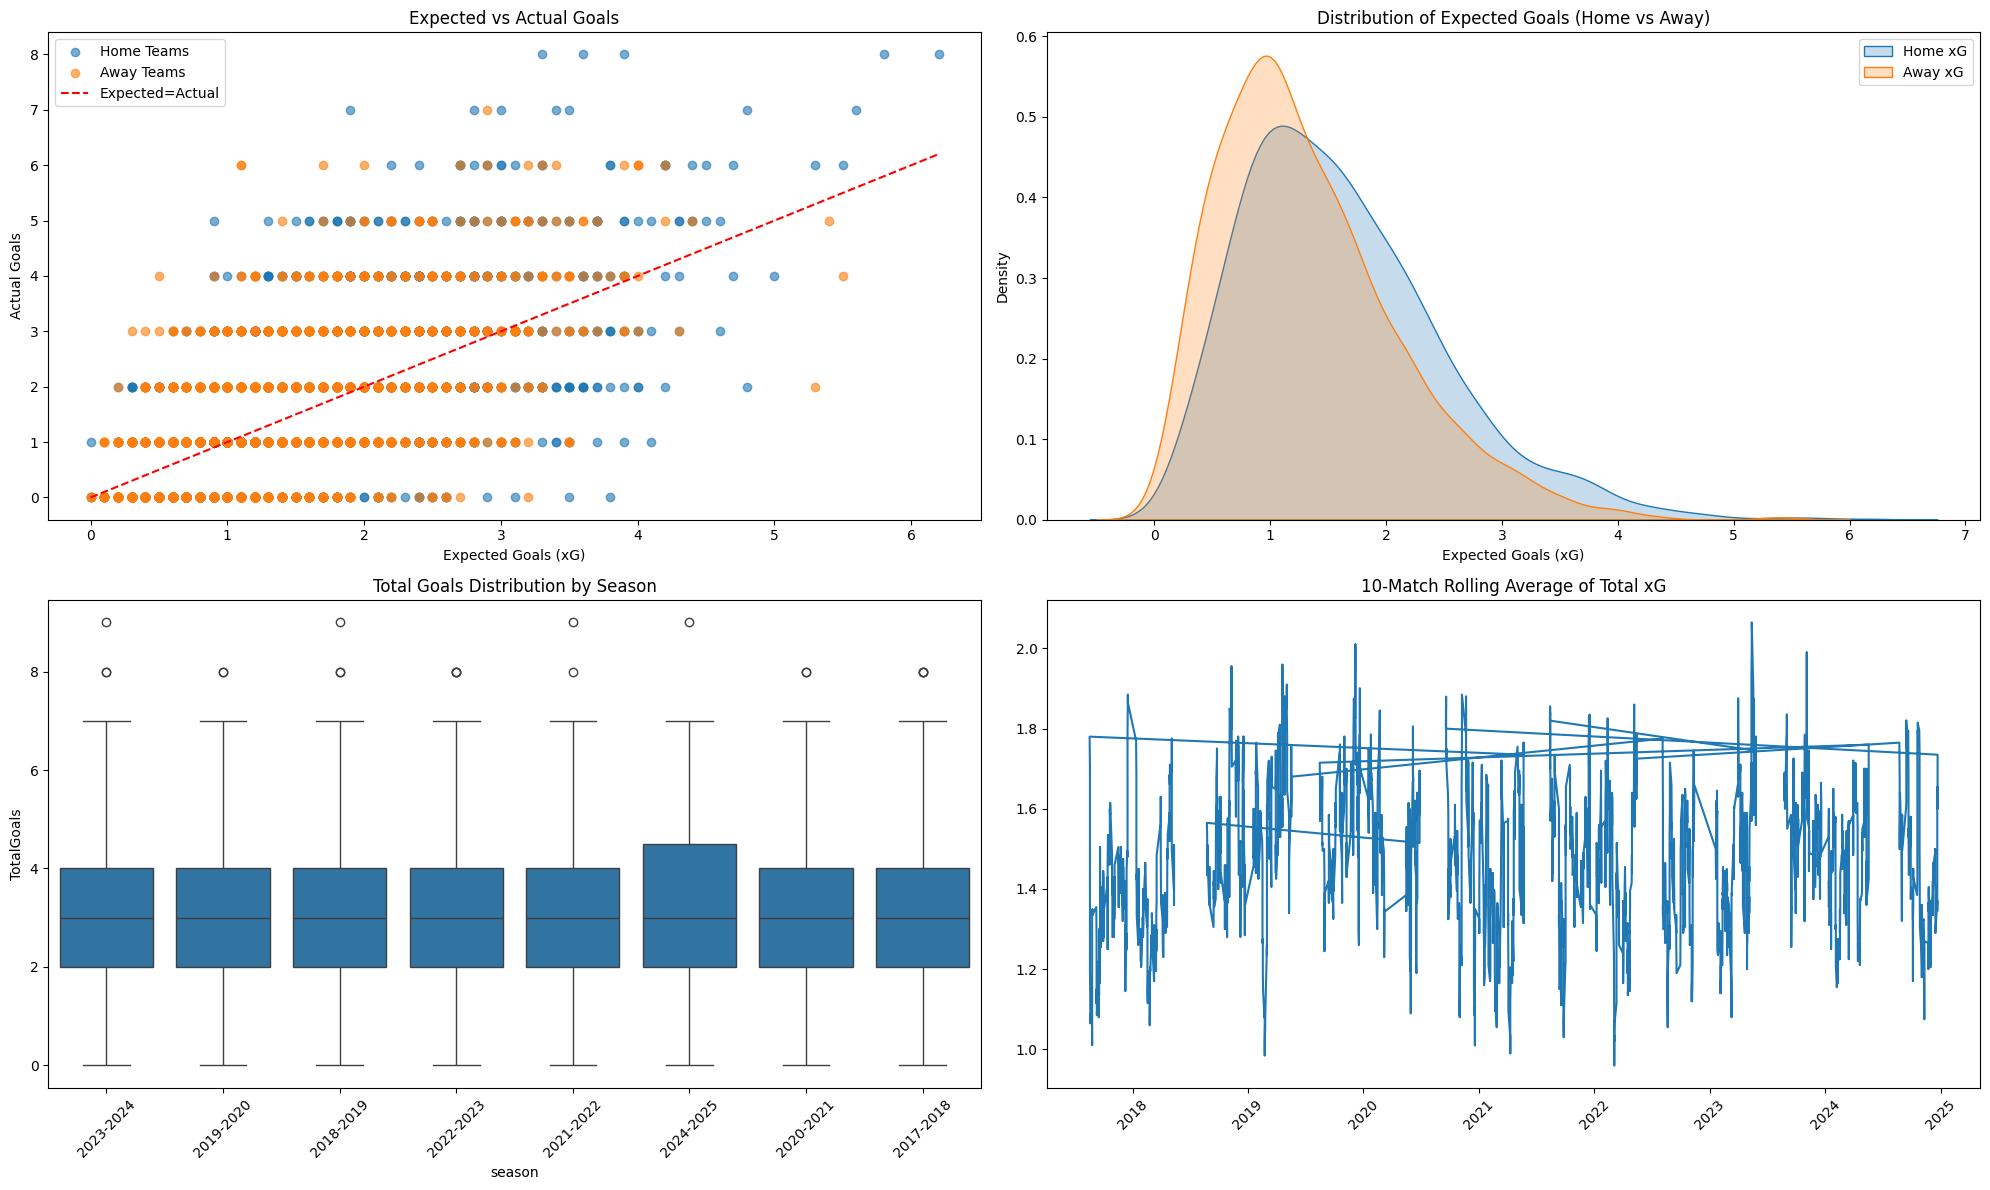

In [23]:
matches_df = analyze_match_data('/Users/ysk/Desktop/fbref/data/allfixture/bundes.csv')

### Bundesliga player stats


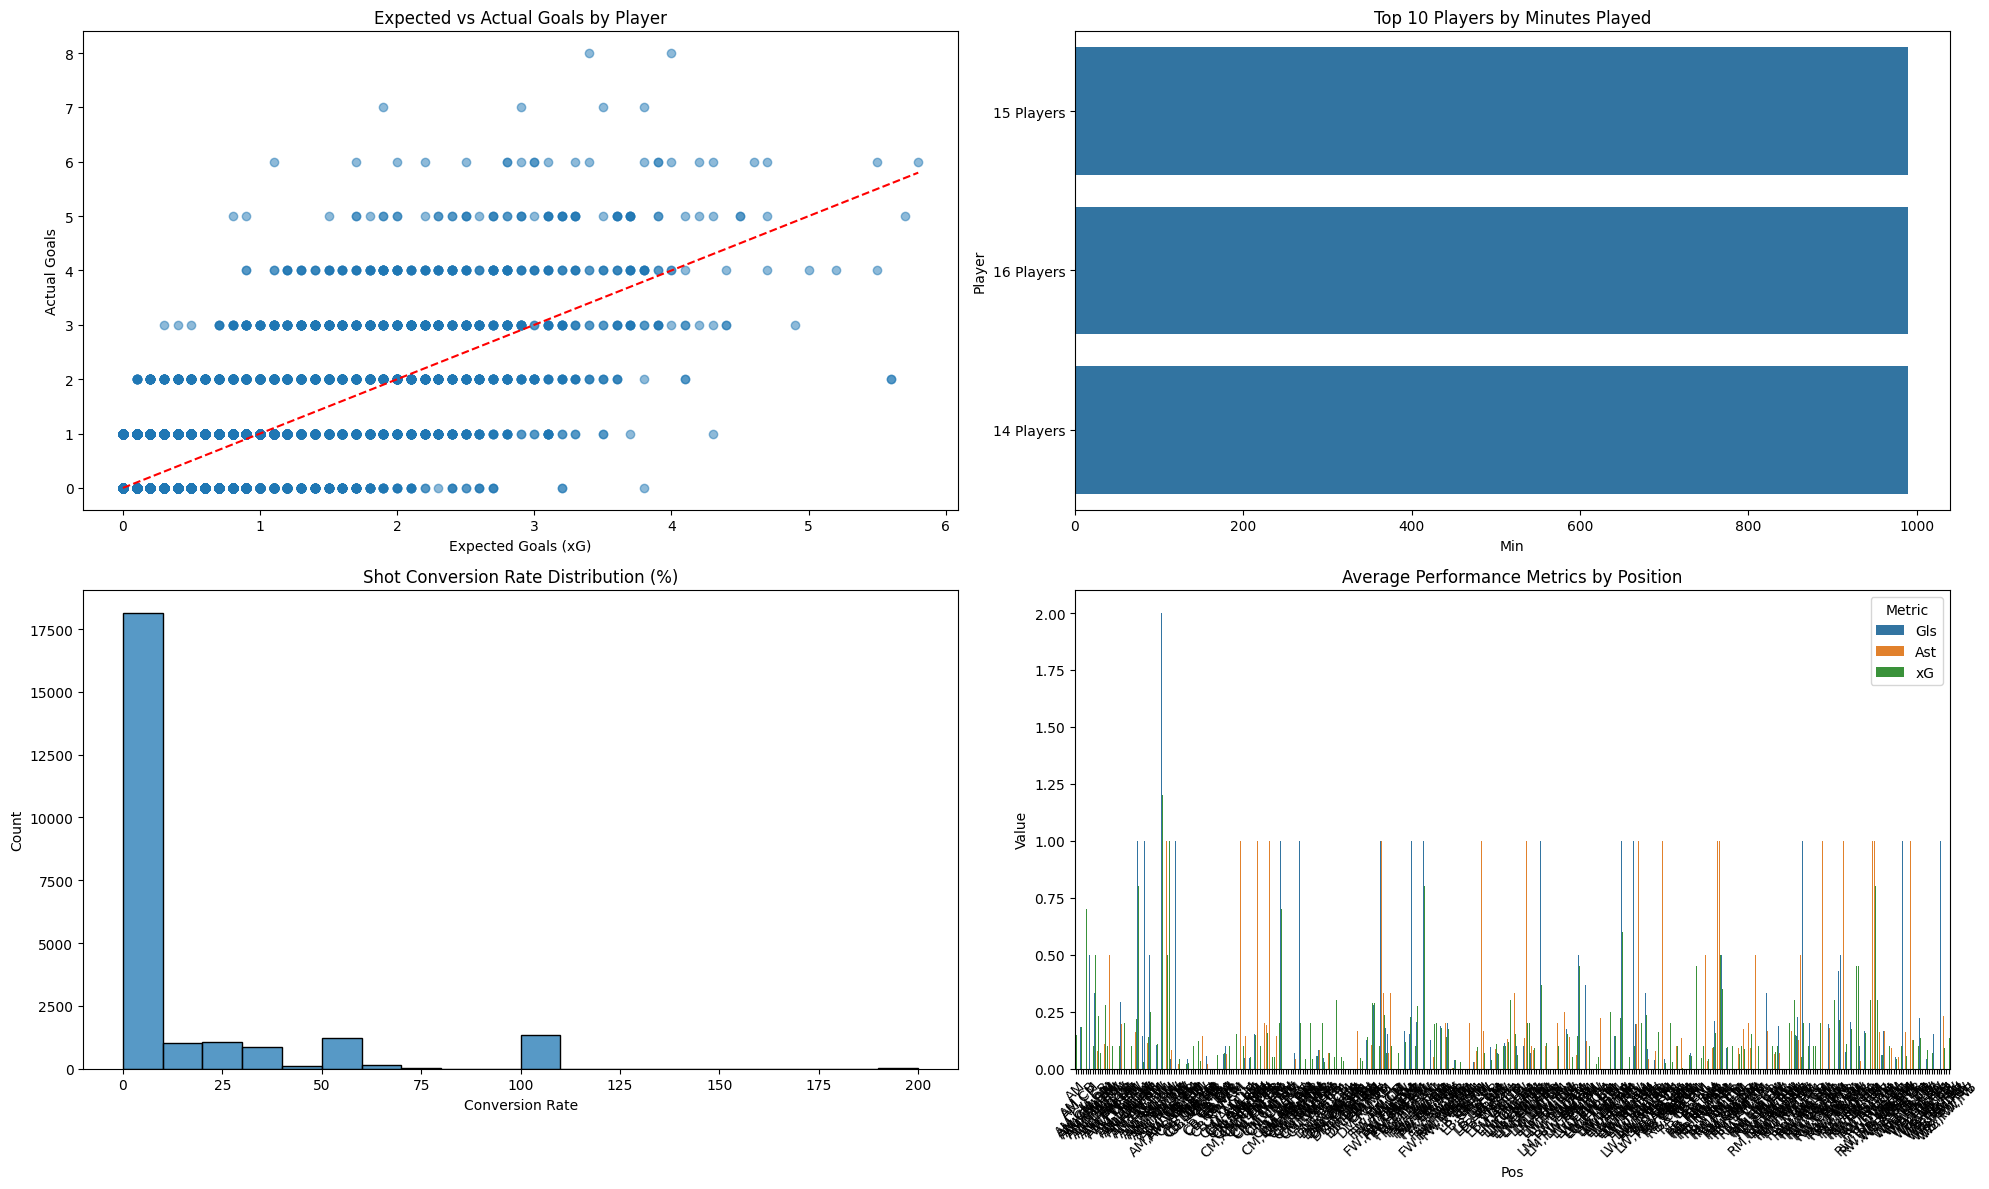

In [24]:
player_df=analyze_player_data('/Users/ysk/Desktop/fbref/data/allplayer/bundesligaplayer.csv')


## Super Lig Match


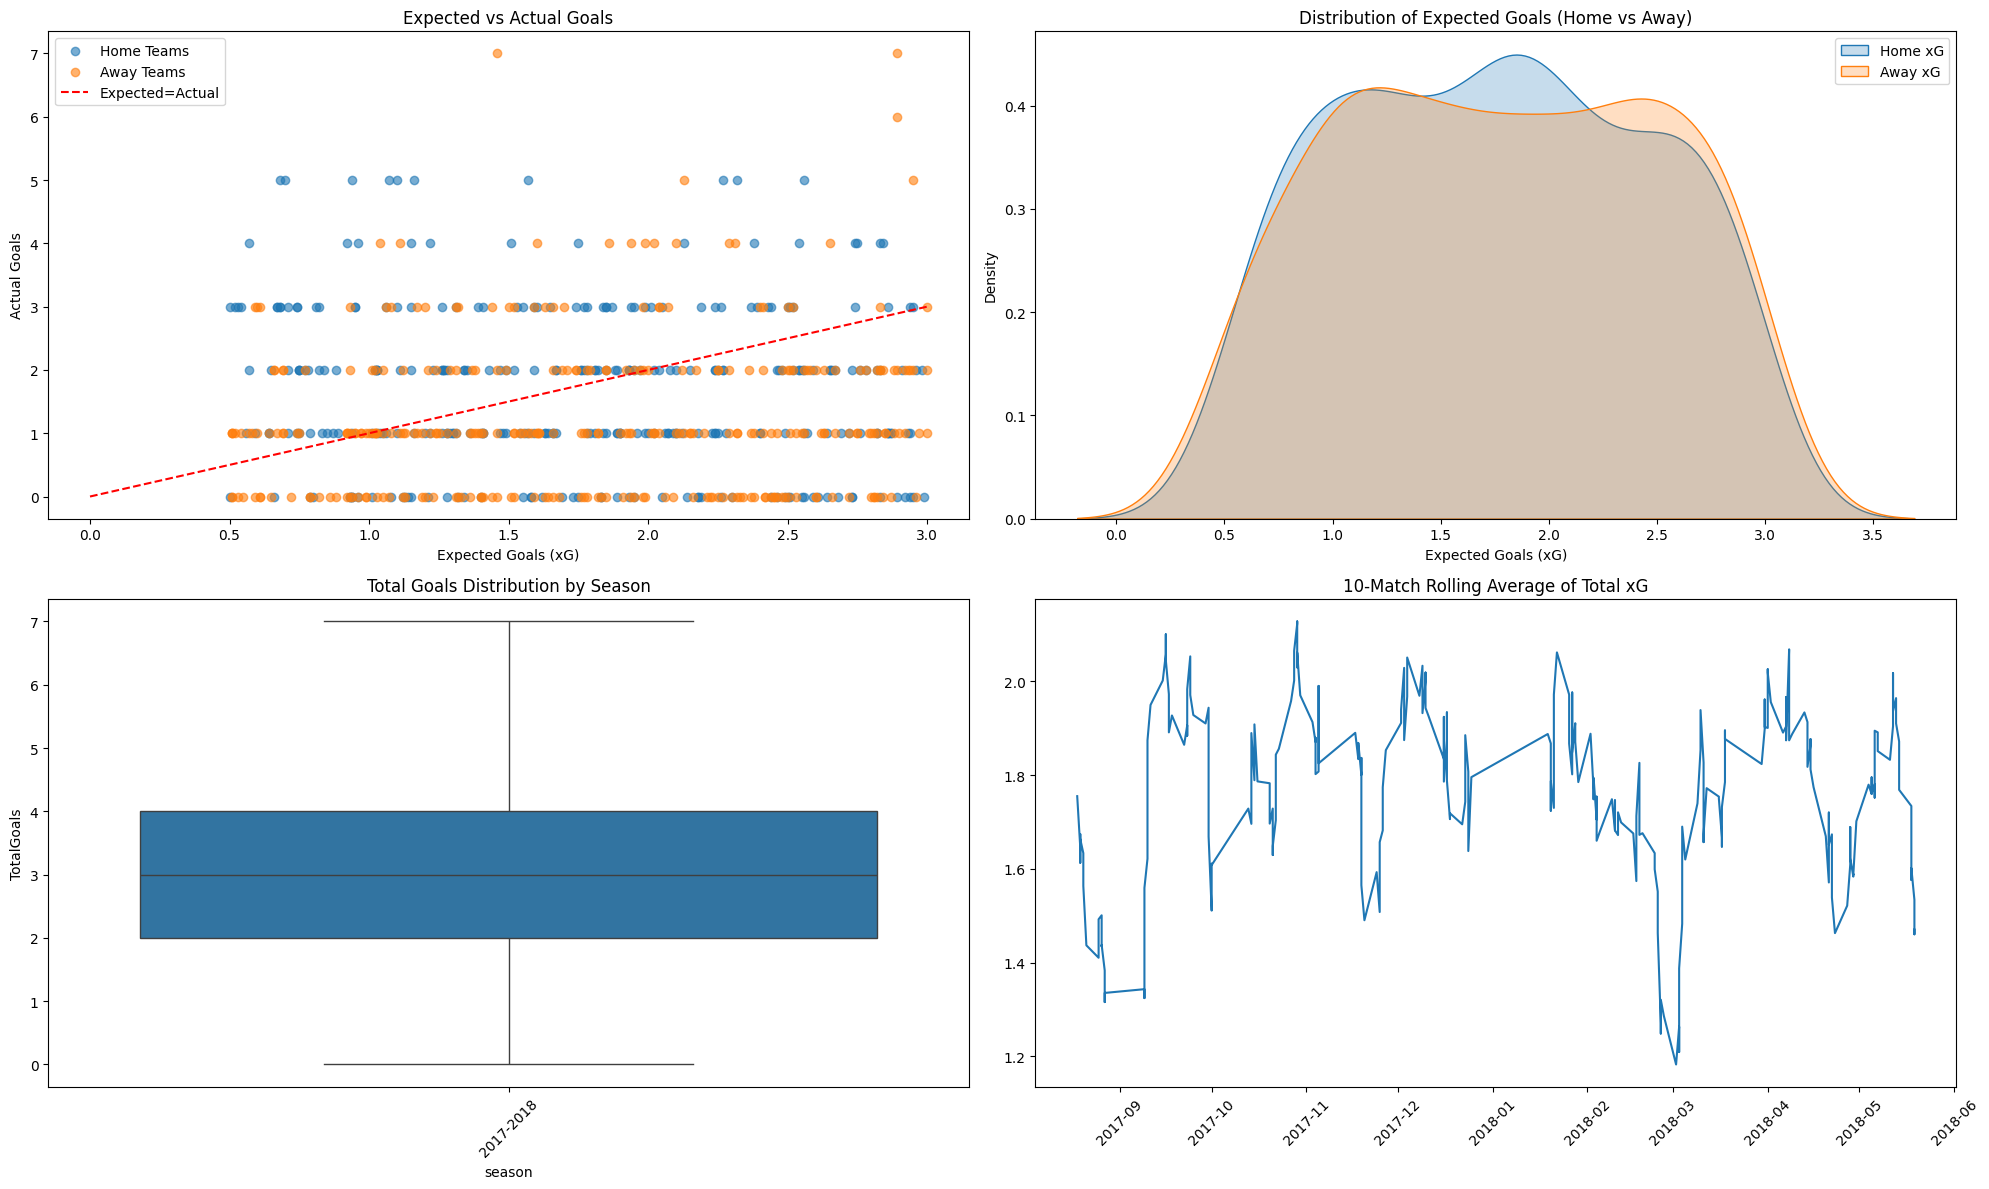

In [31]:
matchdf = analyze_match_data('/Users/ysk/Desktop/fbref/data/super lig/super-lig_2017-2018_fixture_data_processed.csv')

## La Liga Matches


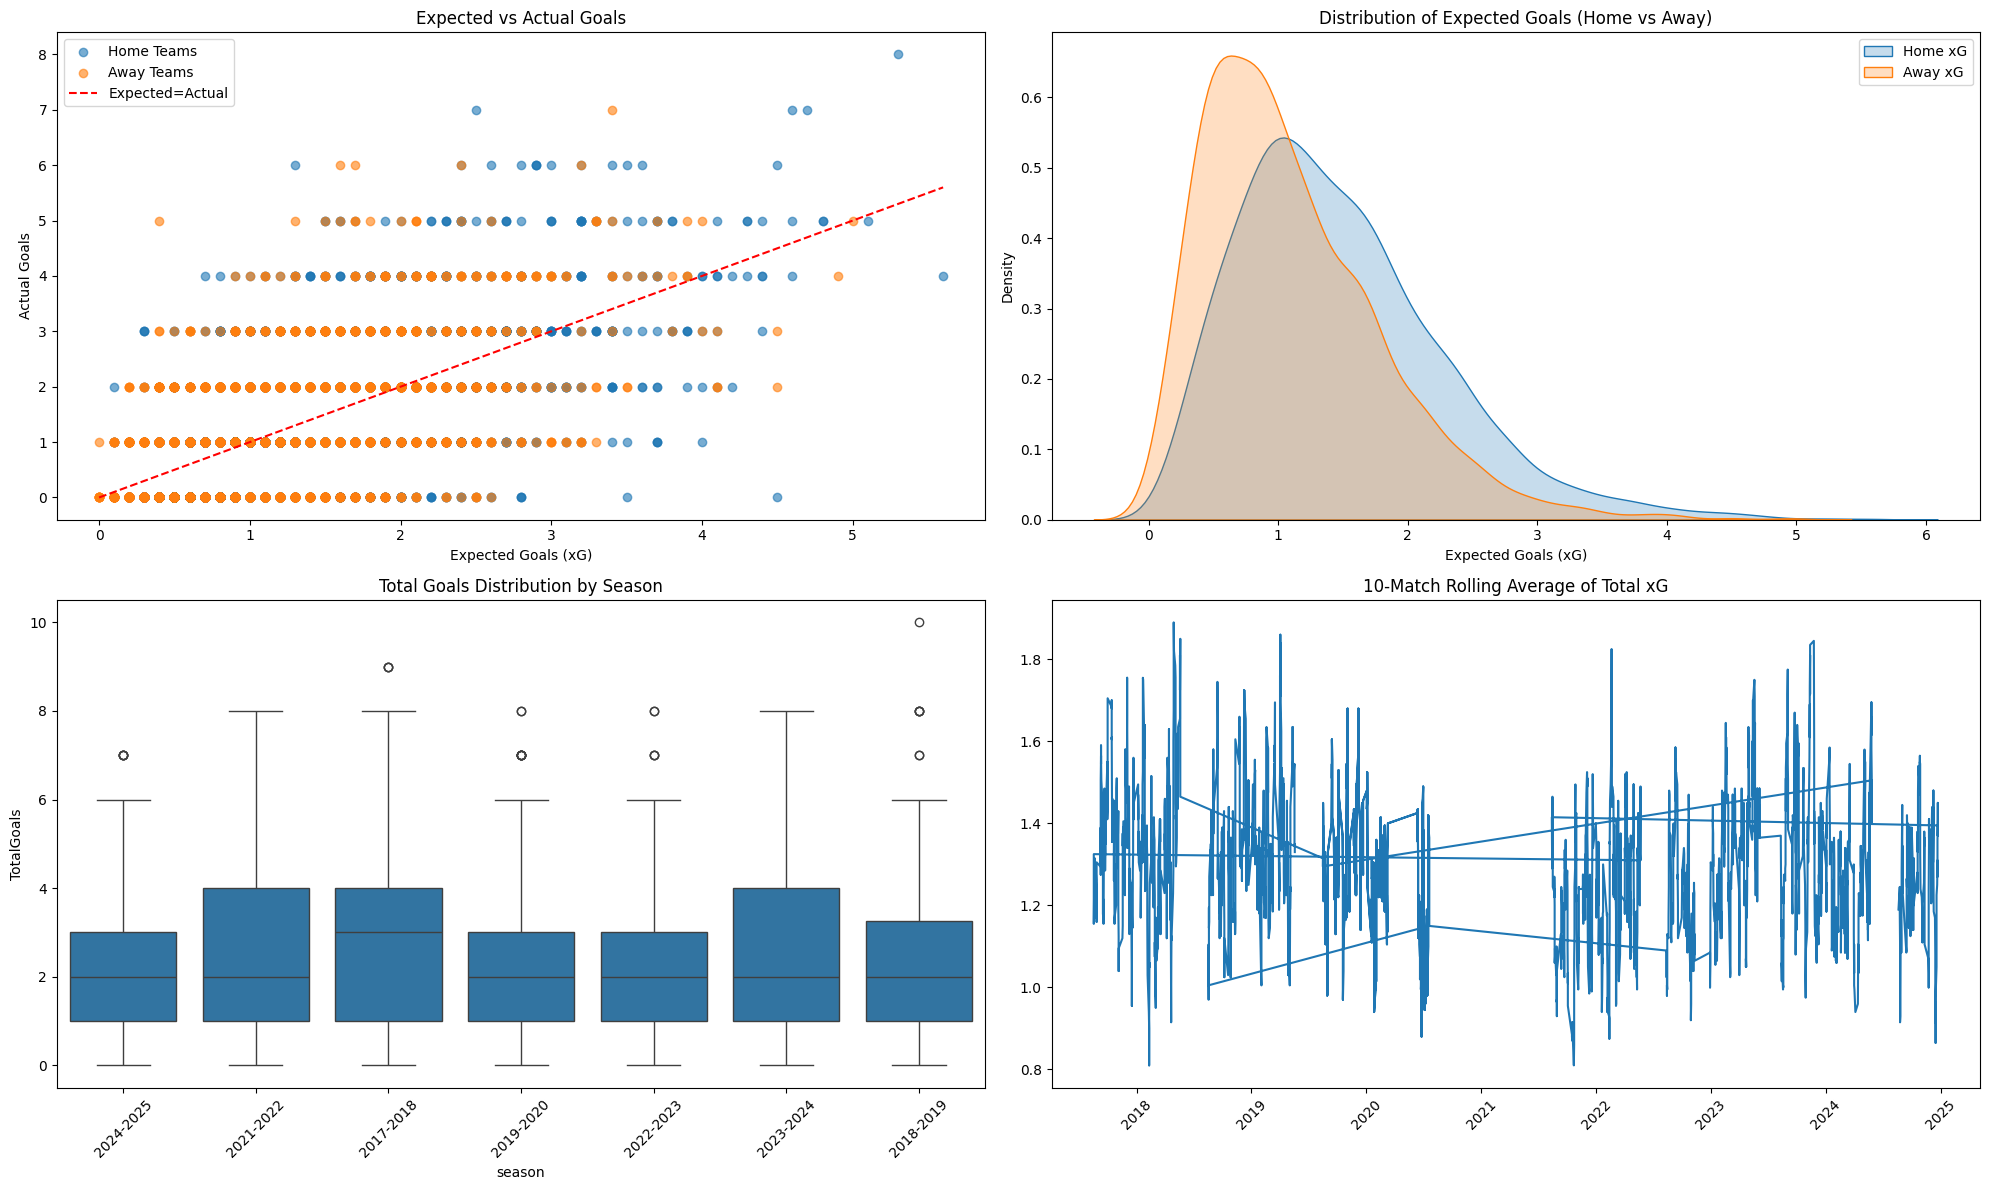

In [33]:
matches_df = analyze_match_data('/Users/ysk/Desktop/fbref/data/allfixture/Laliga.csv')

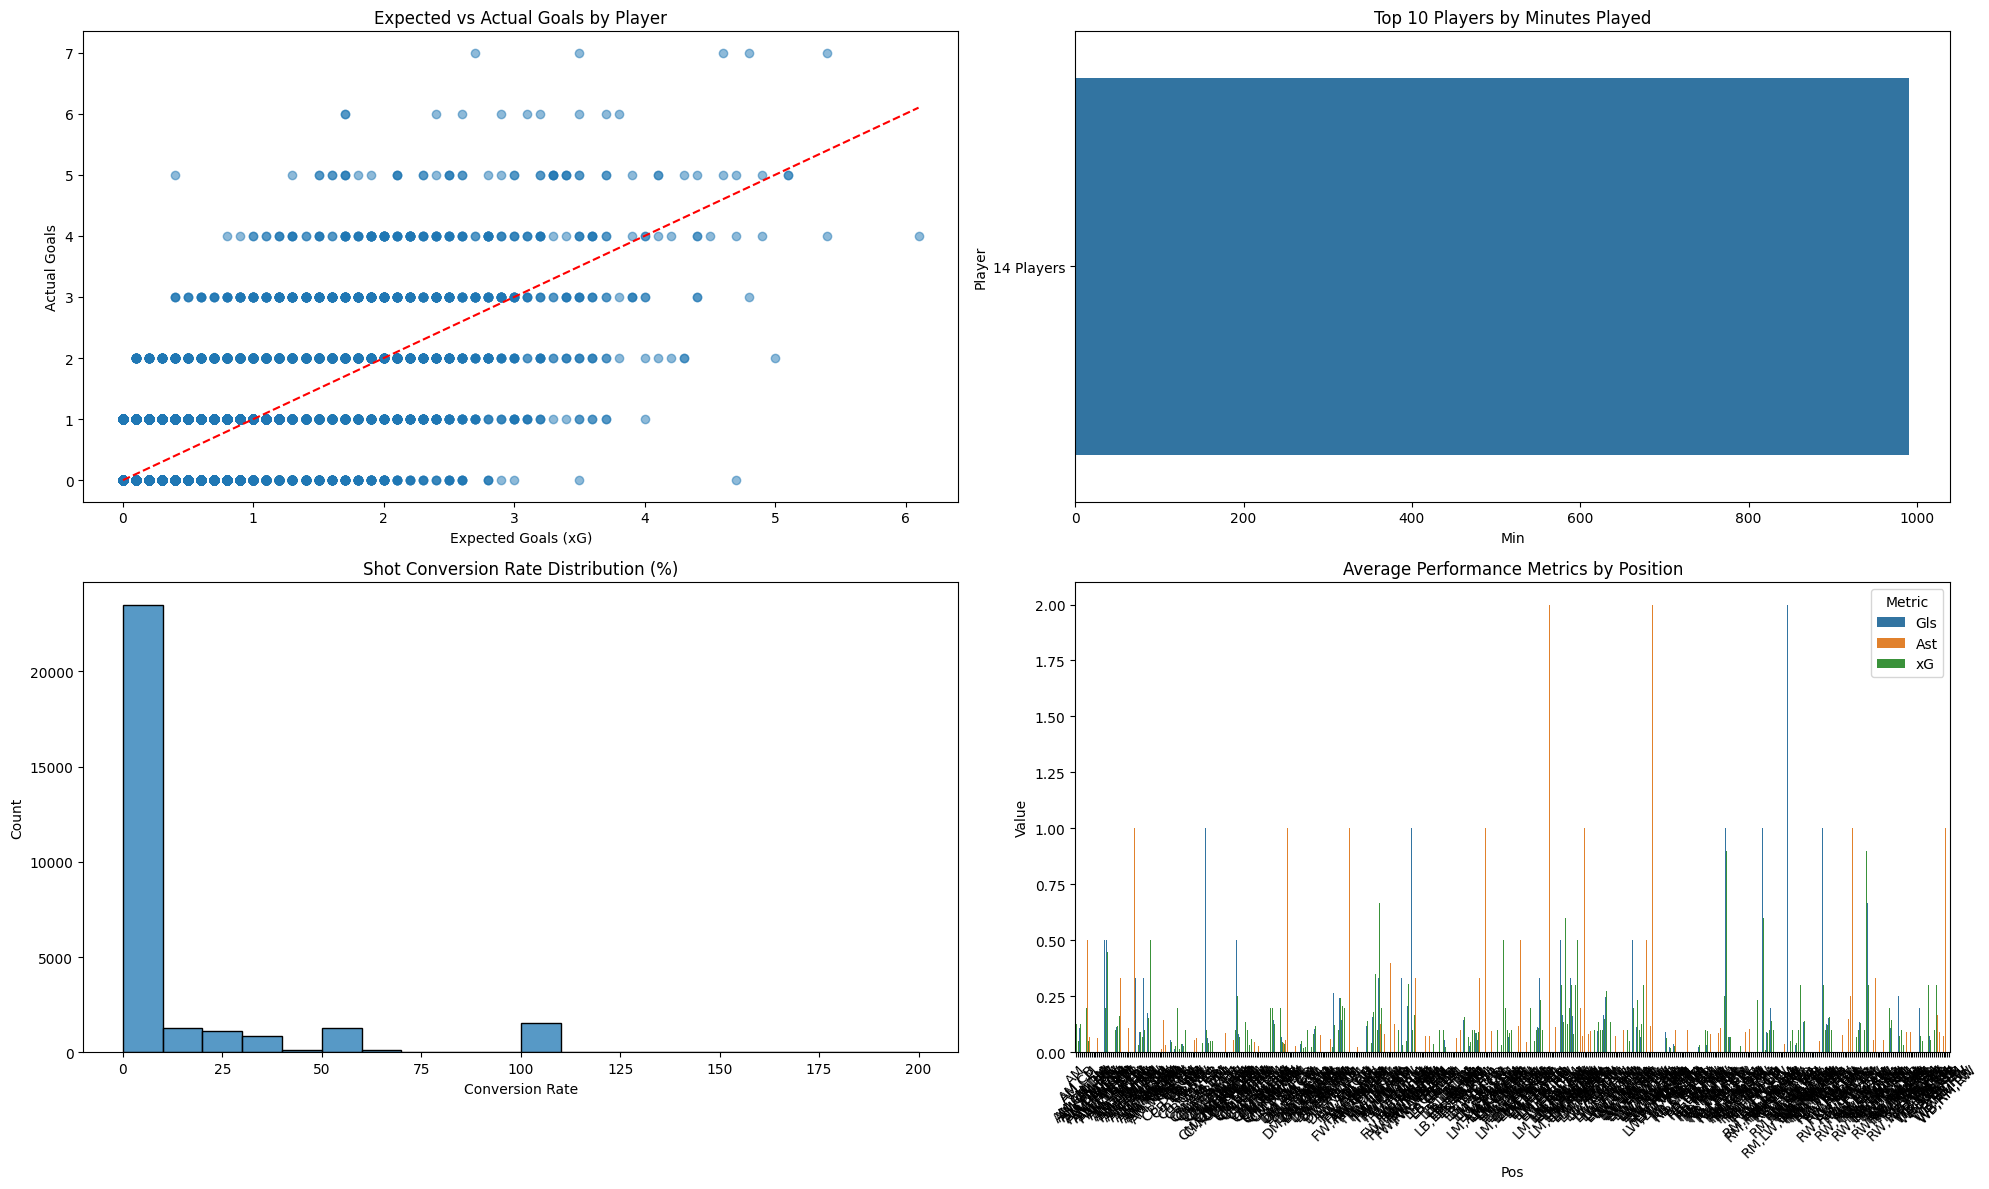

In [46]:
laLigaPlayer = analyze_player_data('/Users/ysk/Desktop/fbref/data/allplayer/laligaplayer.csv')

### Premier league matches


Summary Statistics:
Total Matches: 2819

Average Goals per Match:
Home Teams: 1.56 (xG: 1.51)
Away Teams: 1.29 (xG: 1.24)

Match Outcomes:
Home Wins: 1260 (44.7%)
Away Wins: 914 (32.4%)
Draws: 645 (22.9%)


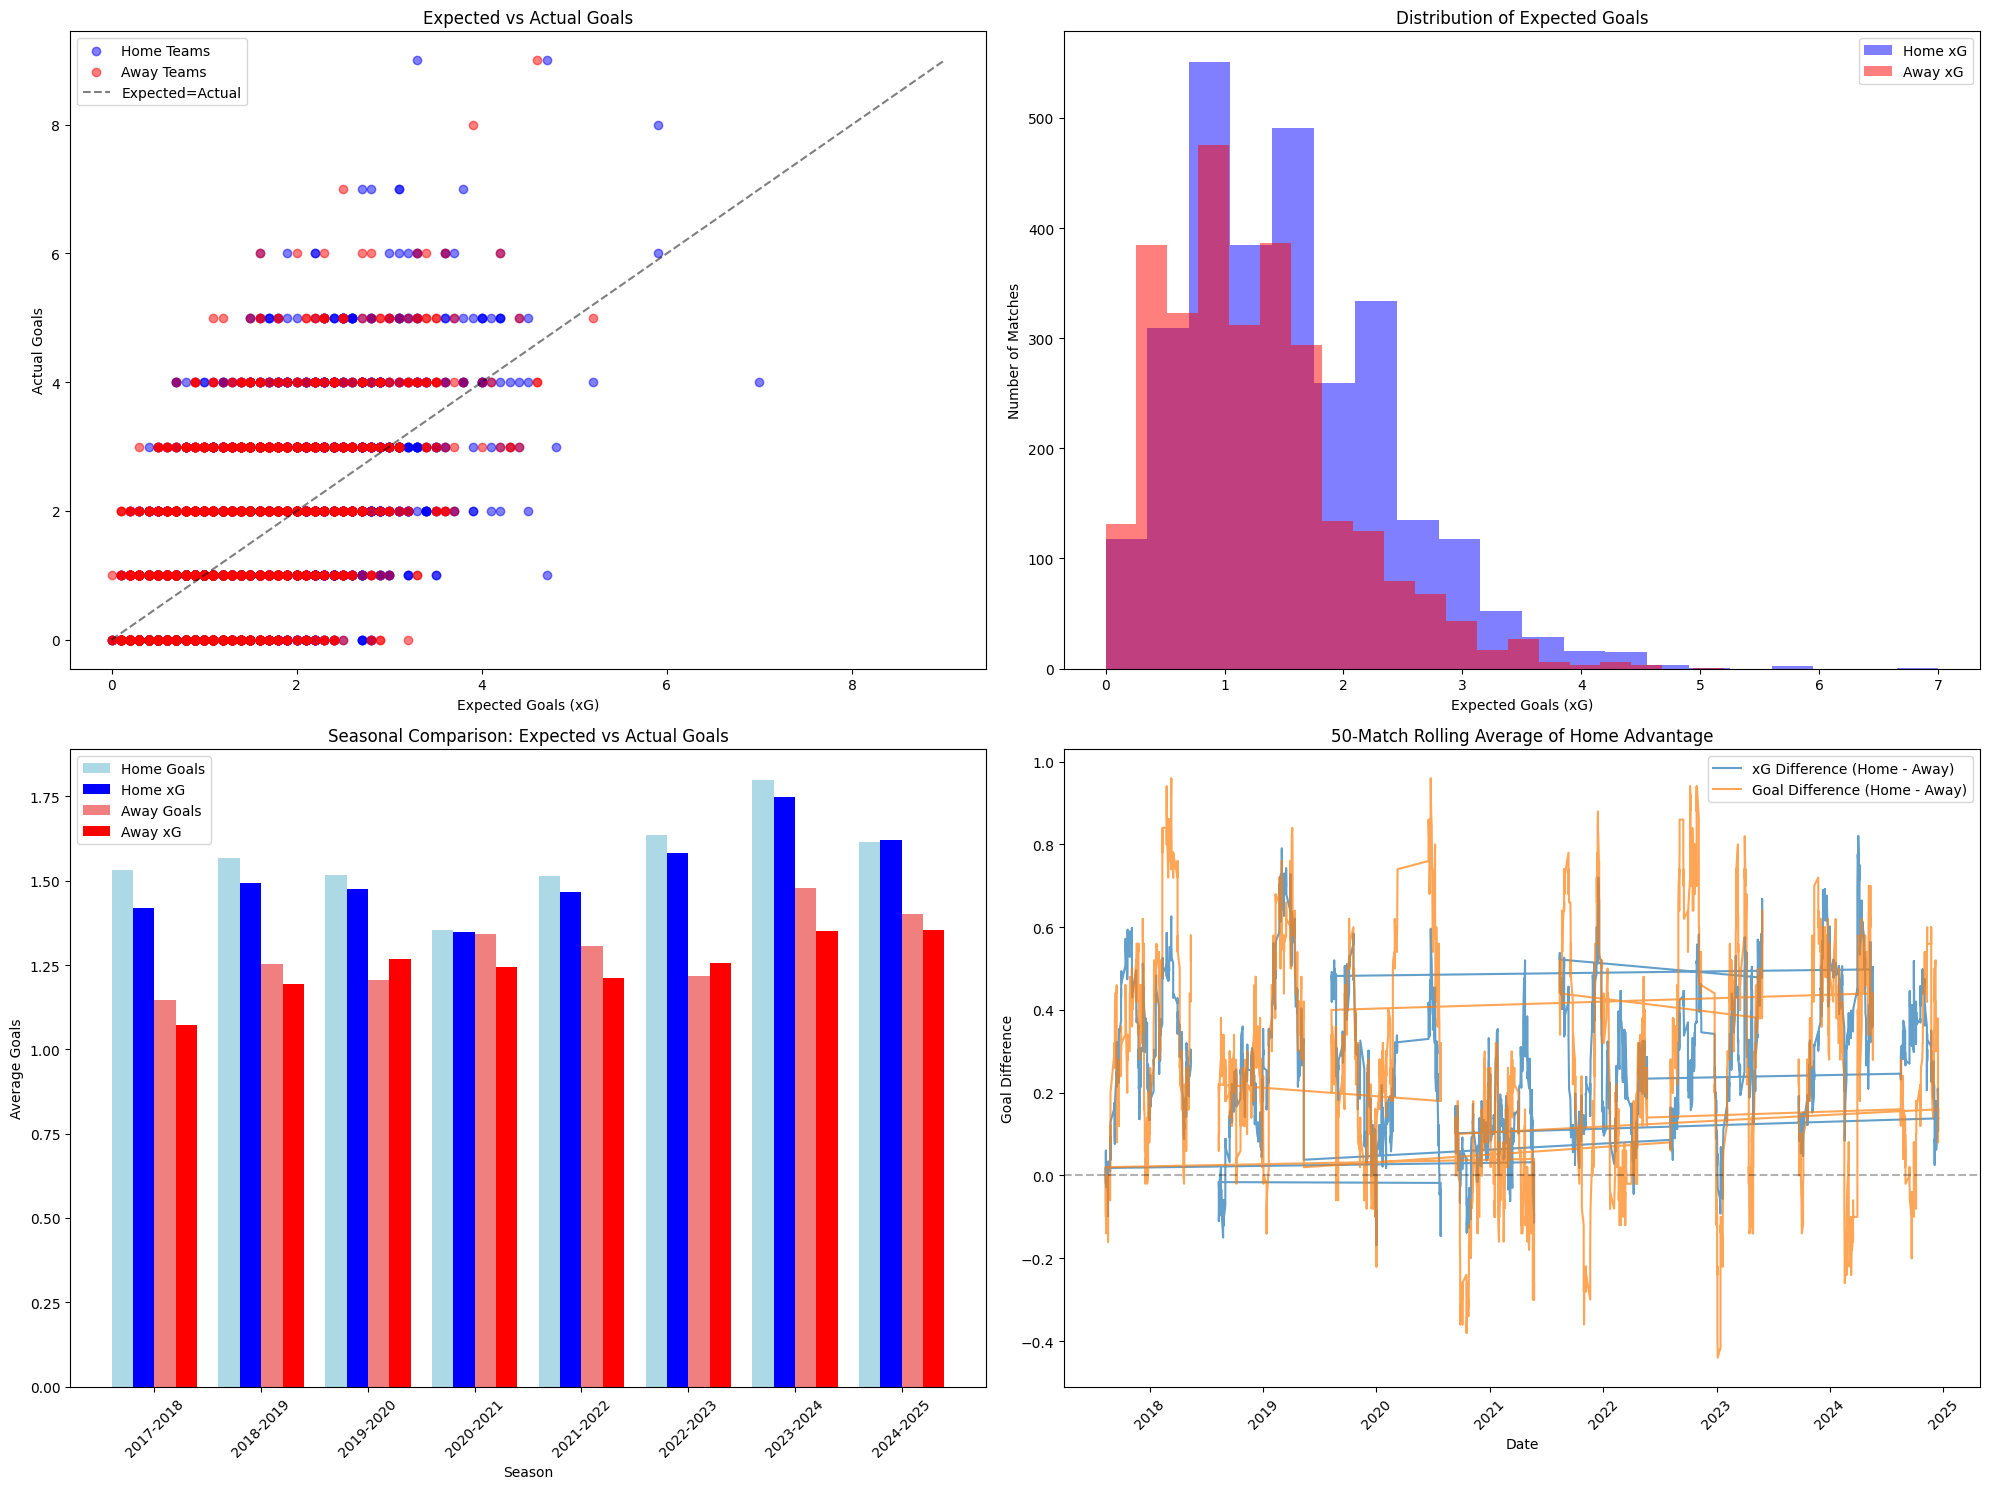

In [54]:
premierMatches = analyze_match_data('/Users/ysk/Desktop/fbref/data/allfixture/Premierleague.csv')

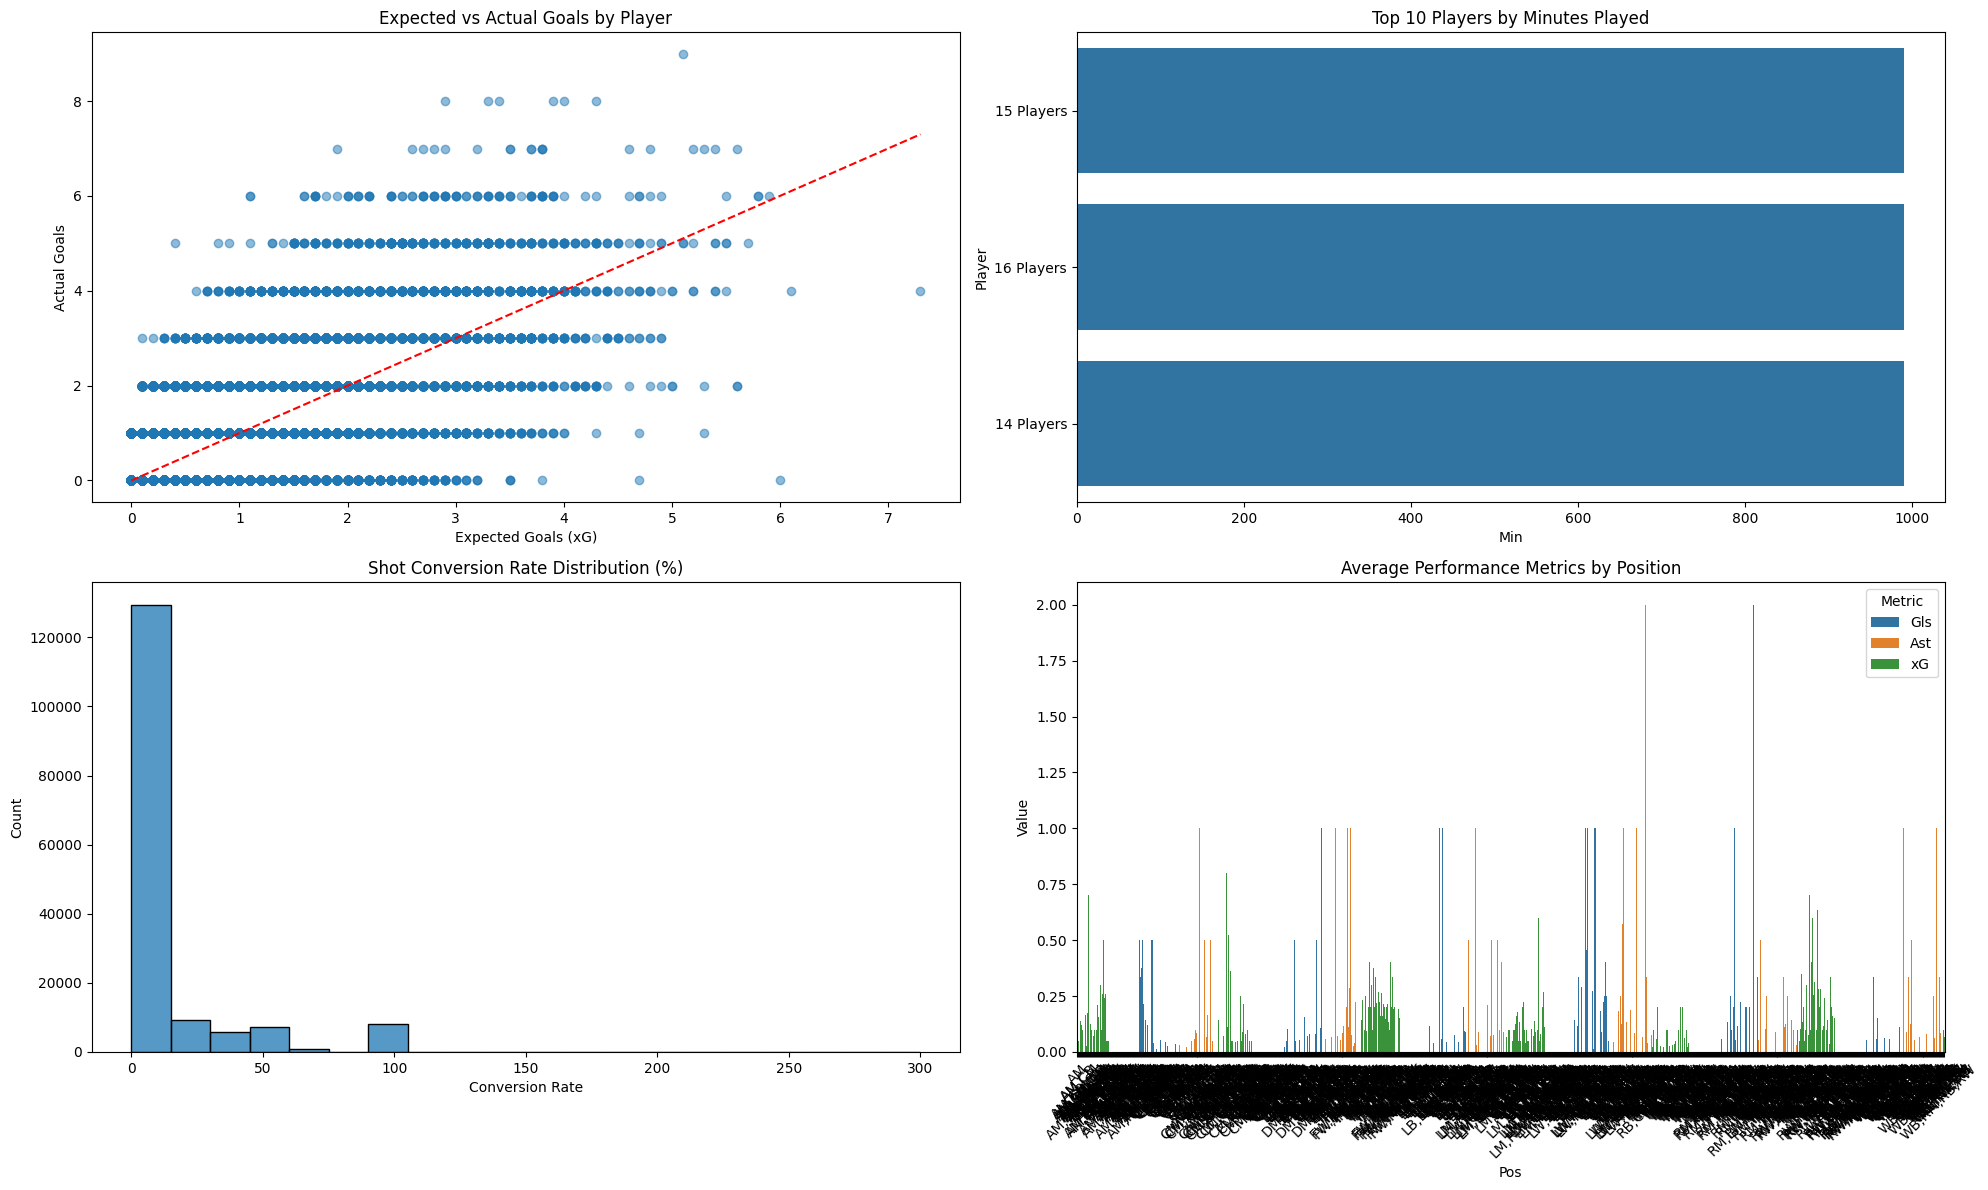

In [47]:
allPlayer = analyze_player_data('/Users/ysk/Desktop/fbref/data/allplayer/all-csv-player.csv')